In [1]:
%matplotlib inline
import astropy.utils.data
import geopandas as gpd
import zipfile
from matplotlib import pyplot as plt

### Download sample data from John Deere

In [23]:
print("Downloading and unzipping seeding sample shapefile")
seedingZip = astropy.utils.data.download_file("https://github.com/JohnDeere/SampleData/blob/master/Shapefiles/Export%20From%20MyJohnDeere%20-%20Seeding.zip?raw=true", cache=True, show_progress=True)
with zipfile.ZipFile(seedingZip, 'r') as zip_ref:
    zip_ref.extractall("./.cache/seeding")
seedingShp = "./.cache/seeding/doc/Merriweather Farms-JT-01-Soybeans.shp"
print("OK")

OK


In [3]:
gdf = gpd.read_file(seedingShp)

### Time working on seed

In [4]:
import dateutil.parser

st = gdf['IsoTime'].min()
start_time = dateutil.parser.parse(st)
print('start=%s' % start_time)

et = gdf['IsoTime'].max()
end_time = dateutil.parser.parse(et)
print('  end=%s' % end_time)

start=2016-04-23 14:32:04.200000+00:00
  end=2016-04-24 02:05:56.357000+00:00


### Planting path

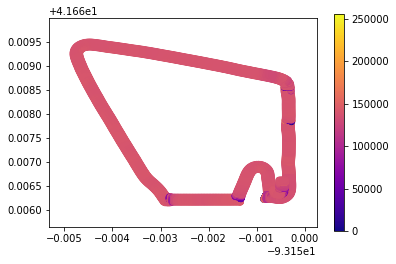

In [5]:
f, ax = plt.subplots(1)
bounds = gdf.geometry.total_bounds
ax.set_xlim([bounds[0]-0.0005, bounds[2]+0.0005])
ax.set_ylim([bounds[1]-0.0005, bounds[3]+0.0005])
gdf2 = gdf.loc[gdf['IsoTime']<'2016-04-23T22:40:24.997Z']
gdf2.plot(ax=ax, column='AppliedRate', cmap='plasma', figsize=(50, 50), legend=True)
plt.show()

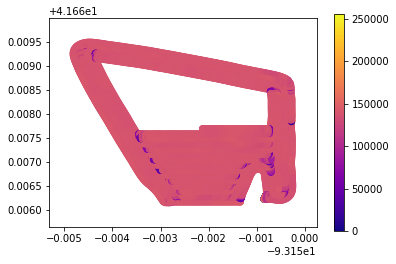

In [32]:
f, ax = plt.subplots(1)
bounds = gdf.geometry.total_bounds
ax.set_xlim([bounds[0]-0.0005, bounds[2]+0.0005])
ax.set_ylim([bounds[1]-0.0005, bounds[3]+0.0005])
gdf2 = gdf.loc[gdf['IsoTime']<'2016-04-24T01:37:22.595Z']
gdf2.plot(ax=ax, column='AppliedRate', cmap='plasma', figsize=(50, 50), legend=True)
plt.show()

#### Animate

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import sys

In [27]:
fig, ax = plt.subplots(1, figsize=(5,5))
bounds = gdf.geometry.total_bounds
vmin = gdf['AppliedRate'].min()
vmax = gdf['AppliedRate'].max()

def animate(i):
    sys.stdout.write('.')
    ax.clear()
    ax.set_xlim([bounds[0]-0.0005, bounds[2]+0.0005])
    ax.set_ylim([bounds[1]-0.0005, bounds[3]+0.0005])
    ax.set_axis_off()
    gdf2 = gdf[0:i]
    gdf2.plot(ax=ax, column='AppliedRate', cmap='plasma', vmin=vmin, vmax=vmax, legend=False)


anim = animation.FuncAnimation(fig, animate, frames=range(1,int(round(len(gdf))),800), interval=50)
plt.close()


In [28]:
print('Generating frames...')
HTML(anim.to_jshtml())

Generating frames...
.......................................................................

<Figure size 432x288 with 0 Axes>

In [ ]:
anim.save('output/seed_path.mp4', fps=30, extra_args=['-vcodec', 'libx264'])